<a href="https://www.kaggle.com/code/celalngr/turkey-earthquake-data-analysis?scriptVersionId=219195795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Türkiye Earthquake Data Analysis

## Introduction


* Turkey's Seismic Situation

Turkey is a country with a high earthquake risk due to its location on active fault lines.
Turkey, which has witnessed many devastating earthquakes throughout history, is one of the most active seismic regions in the world.

* Purpose of Analysis

This analysis aims to examine and interpret existing data on earthquakes in Turkey.
The main goal of the study is to gain a deeper understanding of earthquake frequencies, magnitudes and affected areas.

The dataset includes magnitude, depth, coordinate and date information of earthquakes covering a certain time period.

* Social and Economic Impacts of Earthquakes

Earthquakes in Turkey have not only caused loss of life, but have also deeply affected the economic and social structure. This study is a starting point to better understand the effects of earthquakes and evaluate future measures.                                                                               
* Significance of the Study

Earthquake analyses provide important information for decision makers in critical areas such as disaster management and urban planning. In a country with a high earthquake risk such as Turkey, such analyses are vital in terms of raising awareness and developing risk reduction strategies.

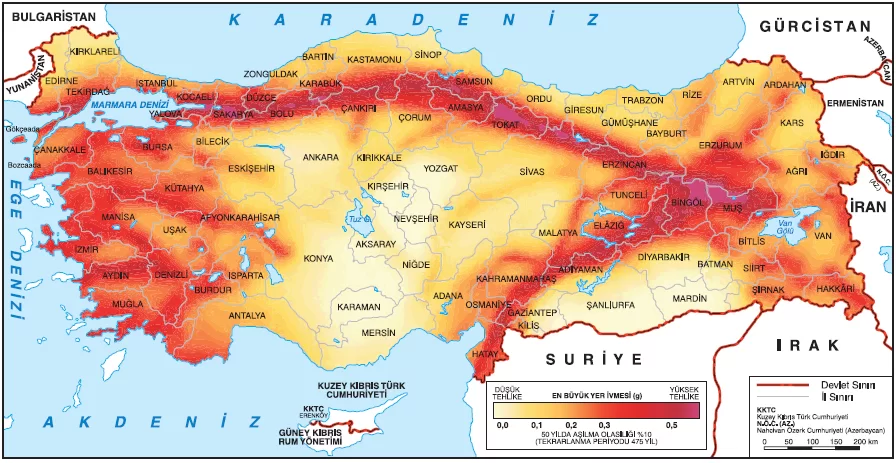

## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Data Analysis and Import](#3)
4. [Data Distributions](#4)
5. [Earthquake Frequency by Year](#5)
6. [Is there an earthquake concentration at certain times of the day?](#6)
7. [Is there a seasonal or monthly change?](#7)
8. [Earthquake Magnitudes](#8)
9. [Provinces with the highest earthquake depth](#9)
10. [Relationship Between Earthquake Magnitude and Earthquake Depth](#10)
11. [In which cities do major earthquakes occur more frequently?](#11)
12. [Map of Türkiye showing major earthquakes](#12)
13. [Map of Türkiye showing major earthquakes](#13)


<a id="1"></a>
## Python Libraries
* Python libraries we will use

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trkiye-depremler-verisi/veriler.csv


<a id="2"></a>
## Data Content
* **No:** Unique sequence number for each earthquake.
* **Earthquake Code:** A unique identification code assigned to the earthquake.
* **Date of occurrence:** Date the earthquake occurred.
* **Time of occurrence:** Time the earthquake occurred.
* **Latitude:** Latitude of the epicenter of the earthquake.
* **Longitude:** Longitude of the epicenter of the earthquake.
* **Der(km):** Depth of the earthquake in the Earth's crust (in kilometers).
* **xM:** Overall magnitude of the earthquake (without specifying the type of measurement).
* **MD:** Short-period magnitude of the earthquake (MD: Duration Magnitude).
* **ML:** Local magnitude of the earthquake (ML: Local Magnitude).
* **Mw:** Moment magnitude of the earthquake (Mw: Moment Magnitude).
* **Ms:** Surface wave magnitude of the earthquake (Ms: Surface Wave Magnitude).
* **Mb:** Body wave magnitude of the earthquake (Mb: Body Wave Magnitude).
* **Type:** Type of earthquake (e.g. tectonic, volcanic).
* **Location:** Region or place name where the epicenter of the earthquake is located.

<a id = "3"></a>
## Data Analysis and Import

In [2]:
## read data
df = pd.read_csv("/kaggle/input/trkiye-depremler-verisi/veriler.csv")

In [3]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230731215338,2023.07.31,21:53:38.29,37.4153,37.1703,4.0,3.5,0.0,3.5,3.4,0.0,0.0,Ke,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]
1,2,20230731152316,2023.07.31,15:23:16.85,38.1413,38.4340,5.2,3.5,0.0,3.5,3.4,0.0,0.0,Ke,AKSU-SINCIK (ADIYAMAN) [West 6.4 km]
2,3,20230731025049,2023.07.31,02:50:49.84,37.8352,26.8353,6.2,3.0,0.0,3.0,0.0,0.0,0.0,Ke,SISAM ADASI (EGE DENIZI)
3,4,20230730201940,2023.07.30,20:19:40.49,40.8085,31.0183,5.3,3.1,0.0,3.1,3.1,0.0,0.0,Ke,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km]
4,5,20230730161352,2023.07.30,16:13:52.62,38.1290,38.1863,2.4,3.0,0.0,3.0,0.0,0.0,0.0,Ke,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km]


In [4]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
df.tail(5)

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
49995,49996,19940916071148,1994.09.16,07:11:48.90,39.05,27.91,4.0,3.0,3.0,0.0,NaN,0.0,0.0,Ke,ZEYTINLIBAG-AKHISAR (MANISA) [South West 0.4 km]
49996,49997,19940915104046,1994.09.15,10:40:46.50,40.75,30.60,6.0,3.2,3.2,0.0,NaN,0.0,0.0,Ke,OSMANBEY-AKYAZI (SAKARYA) [North West 1.0 km]
49997,49998,19940913220202,1994.09.13,22:02:02.00,38.85,26.92,2.0,3.0,3.0,0.0,NaN,0.0,0.0,Ke,CANDARLI KÖRFEZI (EGE DENIZI)
49998,49999,19940913010048,1994.09.13,01:00:48.00,37.42,30.02,18.0,3.5,3.5,0.0,NaN,0.0,0.0,Ke,PINARBASI-KEMER (BURDUR) [South West 4.2 km]
49999,50000,19940911070348,1994.09.11,07:03:48.00,39.29,29.13,4.0,3.1,3.1,0.0,NaN,0.0,0.0,Ke,KABAKLAR-EMET (KÜTAHYA) [North East 2.2 km]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           50000 non-null  int64  
 1   Deprem Kodu  50000 non-null  int64  
 2   Olus tarihi  50000 non-null  object 
 3   Olus zamani  50000 non-null  object 
 4   Enlem        50000 non-null  float64
 5   Boylam       50000 non-null  float64
 6   Der(km)      50000 non-null  float64
 7   xM           50000 non-null  float64
 8   MD           50000 non-null  float64
 9   ML           50000 non-null  float64
 10  Mw           12922 non-null  float64
 11  Ms           50000 non-null  float64
 12  Mb           50000 non-null  float64
 13  Tip          50000 non-null  object 
 14  Yer          50000 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 5.7+ MB


In [6]:
print(df.dtypes)

No               int64
Deprem Kodu      int64
Olus tarihi     object
Olus zamani     object
Enlem          float64
Boylam         float64
Der(km)        float64
xM             float64
MD             float64
ML             float64
Mw             float64
Ms             float64
Mb             float64
Tip             object
Yer             object
dtype: object


<a id = "4"></a>
## Data Distributions

In [7]:
df.columns

Index(['No    ', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem',
       'Boylam', 'Der(km)', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'],
      dtype='object')

In [8]:
df['Yer'].unique()

array(['DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]',
       'AKSU-SINCIK (ADIYAMAN) [West 6.4 km]', 'SISAM ADASI (EGE DENIZI)',
       ..., 'YAKITTEPE-KURTALAN (SIIRT) [South West  1.2 km]',
       'PINARBASI-KEMER (BURDUR) [South West  4.2 km]',
       'KABAKLAR-EMET (KÜTAHYA) [North East  2.2 km]'], dtype=object)

<a id = "5"></a>
## Earthquake Frequency by Year

In [9]:
df['Olus tarihi'] = pd.to_datetime(df['Olus tarihi'])

# Yılı çıkarma
df['Yıl'] = df['Olus tarihi'].dt.year

# Yıllık toplam deprem sayısını hesaplama
yillik_toplam = df.groupby('Yıl').size()

# Sonuç
print(yillik_toplam)

Yıl
1994     282
1995    1365
1996    1227
1997     966
1998     740
1999    1653
2000    1542
2001     965
2002    1564
2003    2000
2004    2592
2005    3403
2006    1827
2007    2598
2008    2625
2009    2179
2010    1995
2011    3364
2012    1898
2013     940
2014     939
2015    1001
2016     776
2017    1713
2018     677
2019     974
2020    2212
2021    1257
2022     790
2023    3936
dtype: int64


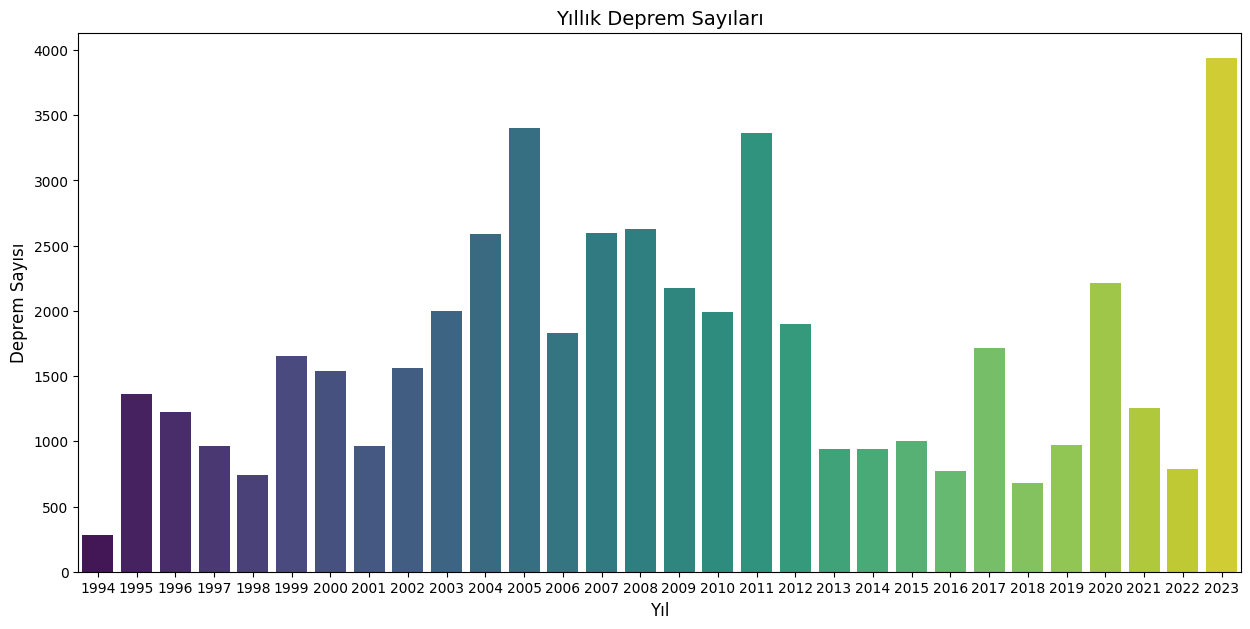

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(x='Yıl', data=df, palette='viridis')
plt.title('Yıllık Deprem Sayıları', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Deprem Sayısı', fontsize=12)
plt.show()

<a id = "6"></a>
## Is there an earthquake concentration at certain times of the day?

In [11]:
df['Deprem zamani'] = pd.to_datetime(df['Olus zamani'], format='%H:%M:%S.%f')
df['Saat'] = df['Deprem zamani'].dt.hour
hourly_counts = df['Saat'].value_counts().sort_index()

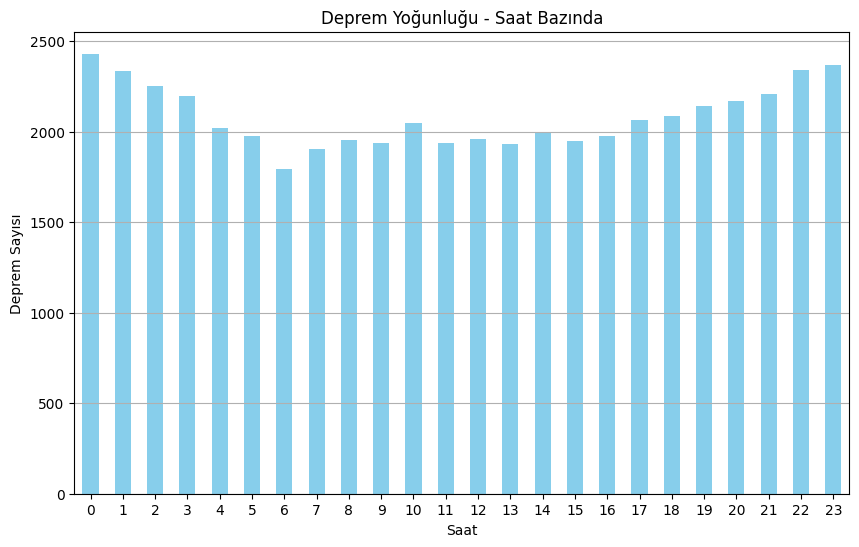

In [12]:
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Deprem Yoğunluğu - Saat Bazında')
plt.xlabel('Saat')
plt.ylabel('Deprem Sayısı')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<a id = "7"></a>
## Is there a seasonal or monthly change?

In [13]:
df['Tarih'] = pd.to_datetime(df['Olus tarihi'], format = '%Y.%m.%d')
df['aylar'] = df['Tarih'].dt.month
df['mevsimler'] = df['Tarih'].dt.month % 12 // 3 + 1 # Mevsim: 1 (İlkbahar), 2 (Yaz), 3 (Sonbahar), 4 (Kış) 
aylar_sayısı = df['aylar'].value_counts().sort_index()

In [14]:
aylar_sayısı

aylar
1     4193
2     6135
3     4281
4     3924
5     4476
6     3972
7     3749
8     3841
9     3159
10    4773
11    4050
12    3447
Name: count, dtype: int64

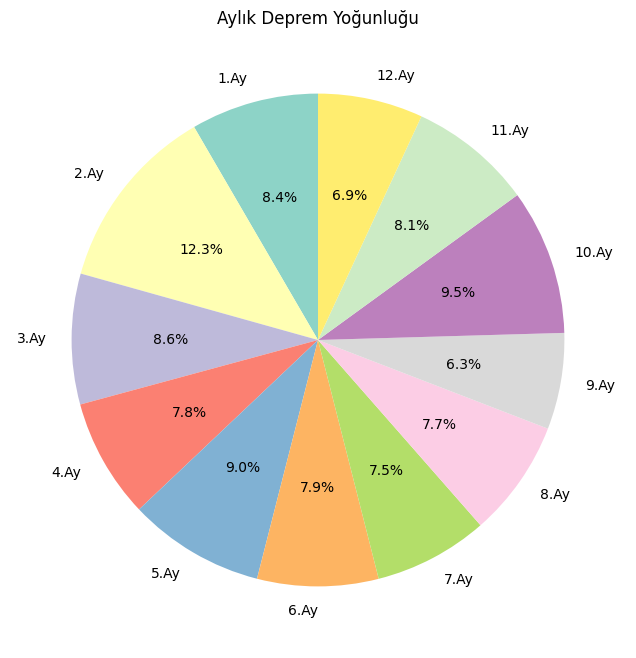

In [15]:
# Aylara Göre Deprem Sayısı

plt.figure(figsize = (8,8))
plt.pie(aylar_sayısı, labels = [f"{i}.Ay" for i in aylar_sayısı.index], autopct = '%1.1f%%', startangle = 90, colors = plt.cm.Set3.colors)
plt.title('Aylık Deprem Yoğunluğu')
plt.show()

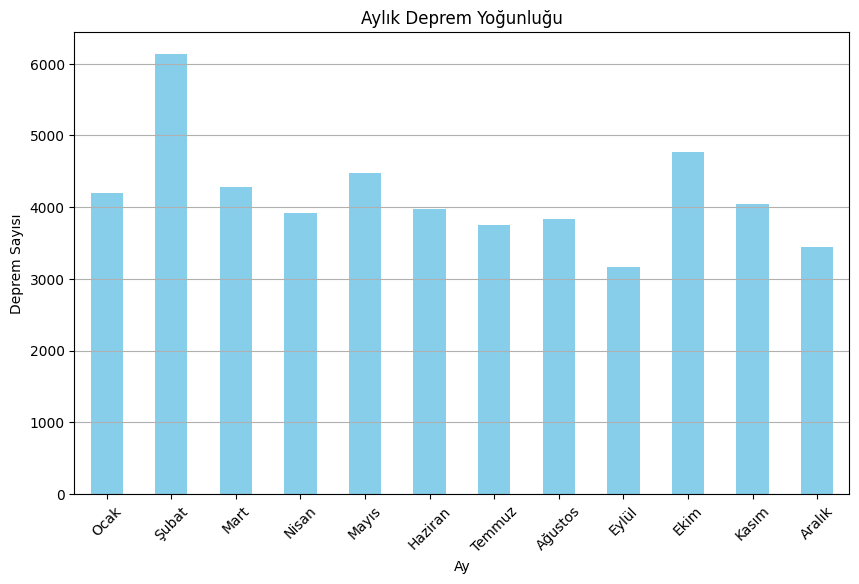

In [16]:
plt.figure(figsize=(10, 6))
aylar_sayısı.plot(kind='bar', color='skyblue')
plt.title('Aylık Deprem Yoğunluğu')
plt.xlabel('Ay')
plt.ylabel('Deprem Sayısı')
plt.xticks(range(12), ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık'], rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
mevsimler_sayısı = df['mevsimler'].value_counts().sort_index()
mevsimler_sayısı

mevsimler
1    13775
2    12681
3    11562
4    11982
Name: count, dtype: int64

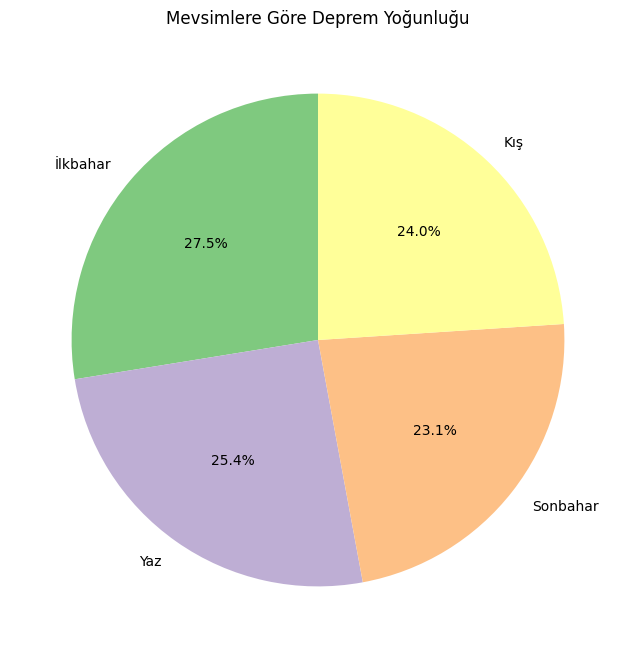

In [18]:
mevsimler_labels = ["İlkbahar","Yaz","Sonbahar","Kış"]
plt.figure(figsize = (8,8))
plt.pie(mevsimler_sayısı, labels = mevsimler_labels, autopct = "%1.1f%%", startangle = 90, colors = plt.cm.Accent.colors )
plt.title("Mevsimlere Göre Deprem Yoğunluğu")
plt.show()

<a id = "8"></a>
## Earthquake Magnitudes

In [19]:
deprem_xM = df[['Yer','Olus tarihi','Olus zamani','xM','Der(km)']].sort_values('xM', ascending = False).head(10).reset_index(drop = True)
deprem_xM

,Yer,Olus tarihi,Olus zamani,xM,Der(km)
0,YAMACOBA-SEHITKAMIL (GAZIANTEP) [North West 0...,2023-02-06,01:17:32.67,7.7,5.5
1,EKINOZU (KAHRAMANMARAS) [North West 2.7 km],2023-02-06,10:24:47.88,7.6,5.0
2,BASISKELE (KOCAELI) [North East 2.0 km],1999-08-17,00:01:37.60,7.4,18.0
3,YEMLICE- (VAN) [North West 1.5 km],2011-10-23,10:41:21.01,7.2,5.0
4,UGUR- (DUZCE) [North East 0.3 km],1999-11-12,16:57:20.80,7.2,25.0
5,EGE DENIZI,2020-10-30,11:51:24.37,6.9,11.2
6,KALABA-SIVRICE (ELAZIG) [North West 2.5 km],2020-01-24,17:55:10.61,6.7,5.0
7,BELPINAR-NURDAGI (GAZIANTEP) [South East 1.3 km],2023-02-06,01:28:17.02,6.6,5.0
8,GOKOVA KORFEZI (AKDENIZ),2017-07-20,22:31:09.66,6.6,7.1
9,AKDENIZ,2022-01-11,01:07:45.92,6.4,8.4


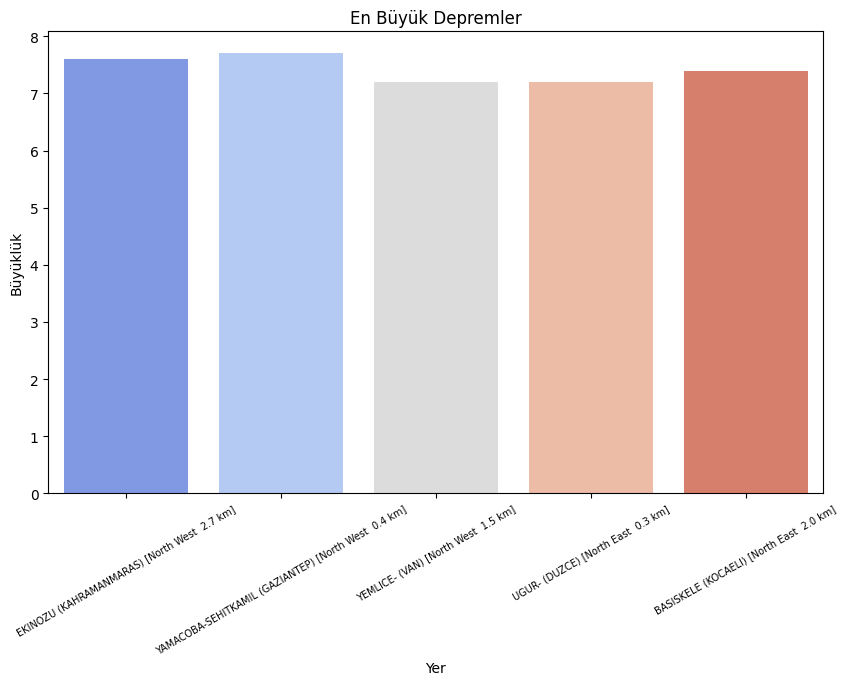

In [20]:
depremBuyuklugu = df[df["xM"] > 7.0]

plt.figure(figsize=(10, 6))
sns.barplot(x="Yer", y="xM", data=depremBuyuklugu, palette="coolwarm")
plt.xticks(rotation=30, fontsize=7)
plt.title("En Büyük Depremler")
plt.xlabel("Yer")
plt.ylabel("Büyüklük")
plt.show()


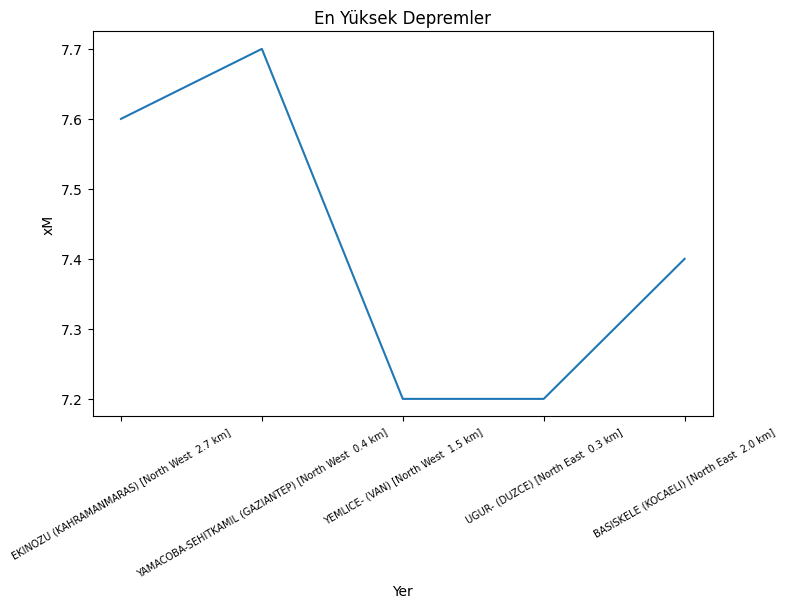

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


depremBuyuklugu_xM = df[df["xM"] > 7.0]

plt.figure(figsize=(8, 5))
sns.lineplot(x="Yer", y="xM", data=depremBuyuklugu_xM)
plt.xticks(rotation=30, fontsize =7)  
plt.title("En Yüksek Depremler")
plt.show()

<a id = "9"></a>
## Provinces with the highest earthquake depth

In [22]:
depremDerinlik = df[['Yer','Olus tarihi','Olus zamani','xM','Der(km)']].sort_values('Der(km)', ascending = False).head(10).reset_index(drop = True)
depremDerinlik

,Yer,Olus tarihi,Olus zamani,xM,Der(km)
0,AKDENIZ,2020-10-01,11:05:37.70,4.9,154.7
1,AKDENIZ,2013-12-05,21:44:15.03,3.0,154.0
2,ONIKI ADALAR (AKDENIZ),2008-11-16,16:43:28.40,3.3,150.0
3,AKDENIZ,2018-04-07,09:03:19.77,3.1,148.3
4,SALUR-MANAVGAT (ANTALYA) [ 1.87 km],2015-02-08,18:20:40.34,3.1,148.3
5,AKDENIZ,2020-06-01,10:56:18.62,3.7,145.4
6,AKDENIZ,2007-01-10,14:49:13.03,3.6,145.3
7,KOS ADASI (AKDENIZ),2016-02-27,04:23:35.28,3.0,144.0
8,KOS ADASI (AKDENIZ),2016-01-19,19:04:43.00,4.1,143.1
9,AKDENIZ,2008-10-26,15:53:54.50,4.5,142.0


<a id = "10"></a>
## Relationship Between Earthquake Magnitude and Earthquake Depth

In [23]:
deprem_xM_a = df[['xM','Der(km)']].sort_values('xM', ascending = False).head(10).reset_index(drop = True)
deprem_xM_a

,xM,Der(km)
0,7.7,5.5
1,7.6,5.0
2,7.4,18.0
3,7.2,5.0
4,7.2,25.0
5,6.9,11.2
6,6.7,5.0
7,6.6,5.0
8,6.6,7.1
9,6.4,8.4


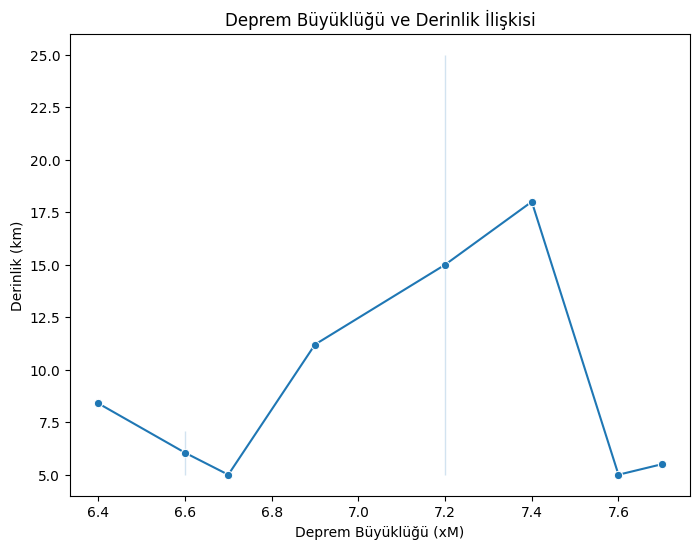

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


deprem_xM_a.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN değerleri temizleme
deprem_xM_a.dropna(inplace=True)

# Grafik çizimi
plt.figure(figsize=(8, 6))
sns.lineplot(x="xM", y="Der(km)", data=deprem_xM_a, marker="o")
plt.title("Deprem Büyüklüğü ve Derinlik İlişkisi")
plt.xlabel("Deprem Büyüklüğü (xM)")
plt.ylabel("Derinlik (km)")
plt.show()

<a id = "11"></a>
## In which cities do major earthquakes occur more frequently?

In [25]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,...,Ms,Mb,Tip,Yer,Yıl,Deprem zamani,Saat,Tarih,aylar,mevsimler
0,1,20230731215338,2023-07-31,21:53:38.29,37.4153,37.1703,4.0,3.5,0.0,3.5,...,0.0,0.0,Ke,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km],2023,1900-01-01 21:53:38.290,21,2023-07-31,7,3
1,2,20230731152316,2023-07-31,15:23:16.85,38.1413,38.4340,5.2,3.5,0.0,3.5,...,0.0,0.0,Ke,AKSU-SINCIK (ADIYAMAN) [West 6.4 km],2023,1900-01-01 15:23:16.850,15,2023-07-31,7,3
2,3,20230731025049,2023-07-31,02:50:49.84,37.8352,26.8353,6.2,3.0,0.0,3.0,...,0.0,0.0,Ke,SISAM ADASI (EGE DENIZI),2023,1900-01-01 02:50:49.840,2,2023-07-31,7,3
3,4,20230730201940,2023-07-30,20:19:40.49,40.8085,31.0183,5.3,3.1,0.0,3.1,...,0.0,0.0,Ke,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km],2023,1900-01-01 20:19:40.490,20,2023-07-30,7,3
4,5,20230730161352,2023-07-30,16:13:52.62,38.1290,38.1863,2.4,3.0,0.0,3.0,...,0.0,0.0,Ke,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km],2023,1900-01-01 16:13:52.620,16,2023-07-30,7,3


In [26]:
df["Il"] = df["Yer"].str.extract(r"\((.*?)\)")
print(df)

       No         Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  \
0           1  20230731215338  2023-07-31  21:53:38.29  37.4153  37.1703   
1           2  20230731152316  2023-07-31  15:23:16.85  38.1413  38.4340   
2           3  20230731025049  2023-07-31  02:50:49.84  37.8352  26.8353   
3           4  20230730201940  2023-07-30  20:19:40.49  40.8085  31.0183   
4           5  20230730161352  2023-07-30  16:13:52.62  38.1290  38.1863   
...       ...             ...         ...          ...      ...      ...   
49995   49996  19940916071148  1994-09-16  07:11:48.90  39.0500  27.9100   
49996   49997  19940915104046  1994-09-15  10:40:46.50  40.7500  30.6000   
49997   49998  19940913220202  1994-09-13  22:02:02.00  38.8500  26.9200   
49998   49999  19940913010048  1994-09-13  01:00:48.00  37.4200  30.0200   
49999   50000  19940911070348  1994-09-11  07:03:48.00  39.2900  29.1300   

       Der(km)   xM   MD   ML  ...   Mb  Tip  \
0          4.0  3.5  0.0  3.5  ...  0.0

In [27]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,...,Mb,Tip,Yer,Yıl,Deprem zamani,Saat,Tarih,aylar,mevsimler,Il
0,1,20230731215338,2023-07-31,21:53:38.29,37.4153,37.1703,4.0,3.5,0.0,3.5,...,0.0,Ke,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km],2023,1900-01-01 21:53:38.290,21,2023-07-31,7,3,KAHRAMANMARAS
1,2,20230731152316,2023-07-31,15:23:16.85,38.1413,38.4340,5.2,3.5,0.0,3.5,...,0.0,Ke,AKSU-SINCIK (ADIYAMAN) [West 6.4 km],2023,1900-01-01 15:23:16.850,15,2023-07-31,7,3,ADIYAMAN
2,3,20230731025049,2023-07-31,02:50:49.84,37.8352,26.8353,6.2,3.0,0.0,3.0,...,0.0,Ke,SISAM ADASI (EGE DENIZI),2023,1900-01-01 02:50:49.840,2,2023-07-31,7,3,EGE DENIZI
3,4,20230730201940,2023-07-30,20:19:40.49,40.8085,31.0183,5.3,3.1,0.0,3.1,...,0.0,Ke,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km],2023,1900-01-01 20:19:40.490,20,2023-07-30,7,3,DUZCE
4,5,20230730161352,2023-07-30,16:13:52.62,38.1290,38.1863,2.4,3.0,0.0,3.0,...,0.0,Ke,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km],2023,1900-01-01 16:13:52.620,16,2023-07-30,7,3,ADIYAMAN


In [28]:
buyuk_depremler = df[df["xM"] >= 7.0]
buyuk_depremler_grup = buyuk_depremler["Yer"].str.extract(r"\((.*?)\)")
buyuk_depremler_sayisi = buyuk_depremler_grup.value_counts()

print(buyuk_depremler_sayisi)

0            
DUZCE            1
GAZIANTEP        1
KAHRAMANMARAS    1
KOCAELI          1
VAN              1
Name: count, dtype: int64


In [29]:
buyuk_depremler_sayisi_df = buyuk_depremler_sayisi.reset_index()
buyuk_depremler_sayisi_df.columns = ["Il", "DepremSayisi"]
print(buyuk_depremler_sayisi_df)

              Il  DepremSayisi
0          DUZCE             1
1      GAZIANTEP             1
2  KAHRAMANMARAS             1
3        KOCAELI             1
4            VAN             1


In [30]:
deprem_xM_b = df[['Il','xM']].sort_values('xM', ascending = False).head(10).reset_index(drop = True)
deprem_xM_b

,Il,xM
0,GAZIANTEP,7.7
1,KAHRAMANMARAS,7.6
2,KOCAELI,7.4
3,VAN,7.2
4,DUZCE,7.2
5,NaN,6.9
6,ELAZIG,6.7
7,GAZIANTEP,6.6
8,AKDENIZ,6.6
9,NaN,6.4


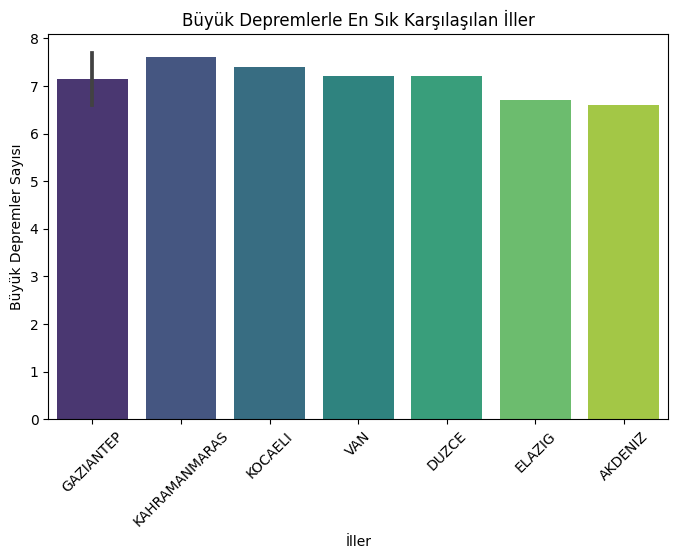

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x = "Il", y = "xM", data = deprem_xM_b, palette = "viridis")
plt.title("Büyük Depremlerle En Sık Karşılaşılan İller")
plt.xlabel("İller")
plt.ylabel("Büyük Depremler Sayısı")
plt.xticks(rotation=45)
plt.show()

<a id = "13"></a>
## Map of Türkiye showing major earthquakes

In [32]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [33]:
import folium


In [34]:

depremler_6_ust = df[df["xM"] > 6]


In [35]:
# Türkiye merkezli bir harita oluştur
turkiye_harita = folium.Map(location=[39.0, 35.0], zoom_start=6)


for _, row in depremler_6_ust.iterrows():
    folium.CircleMarker(
        location=[row["Enlem"], row["Boylam"]],
        radius=row["xM"] * 1.5,  
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        popup=folium.Popup(
            f"<b>Yer:</b> {row['Yer']}<br><b>Enlem:</b> {row['Enlem']}<br><b>Boylam:</b> {row['Boylam']}<br><b>xM:</b> {row['xM']}",
            max_width=250,
        ),
    ).add_to(turkiye_harita)


turkiye_harita.save("turkiye_deprem_haritasi.html")
turkiye_harita


In [36]:
import plotly.express as px

In [37]:
# 6 üzeri depremler
df_6_ust = df[df["xM"] > 6]


In [38]:
import plotly.express as px


fig = px.scatter_geo(
    df_6_ust,  
    lat="Enlem",
    lon="Boylam",
    color="xM",
    size="xM",
    hover_name="Yer",
    animation_frame="Olus tarihi",  
    title="Türkiye'de Yıllara Göre Büyük Depremler (xM > 6)",
    projection="mercator",
    color_continuous_scale="Reds",  
)

# Türkiye'nin sınırları
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="Black",
    showsubunits=True,
    subunitcolor="Gray",
    fitbounds="locations",
)


fig.show()
